Import Libraries

In [21]:
import sys
import os

# This allows notebook to detect the src/ package
sys.path.append(os.path.abspath(".."))

import pandas as pd
from src.eda import FinancialNewsEDA
import nltk
nltk.download('stopwords')

df = pd.read_csv("../data/raw_analyst_ratings.csv")

eda = FinancialNewsEDA(df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



# Basic summary


In [22]:
info, missing = eda.dataset_info()
print("Dataset Info:\n", info)
print("\nMissing Values:\n", missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Dataset Info:
 None

Missing Values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


# Step 3: Descriptive Statistics

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


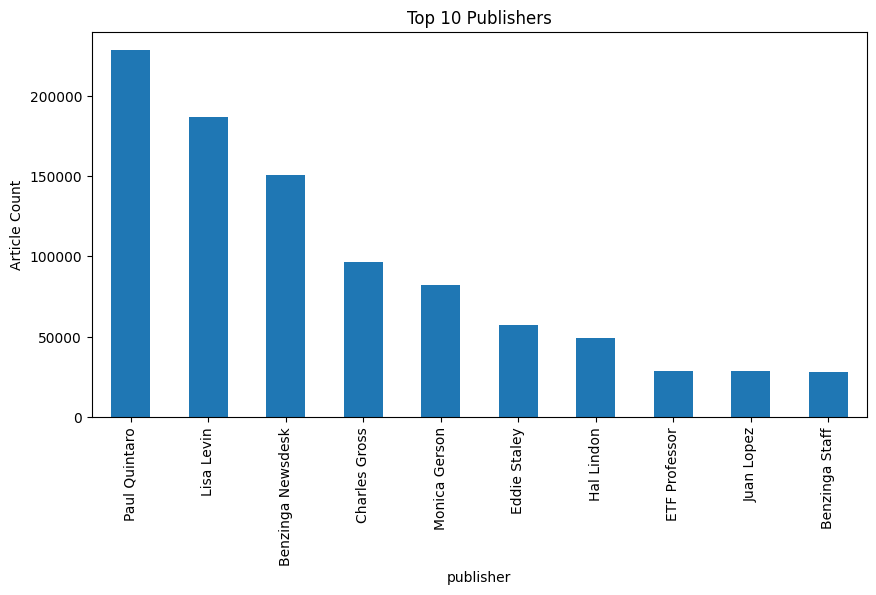

In [23]:
# Headline length stats
print(eda.compute_headline_length())

# Publisher analysis
eda.plot_top_publishers()

# Step 4: Convert date column to datetime

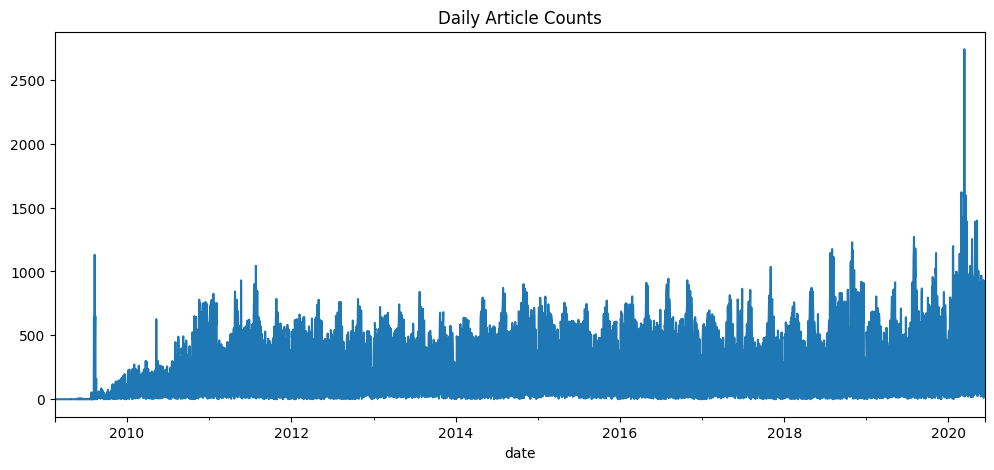

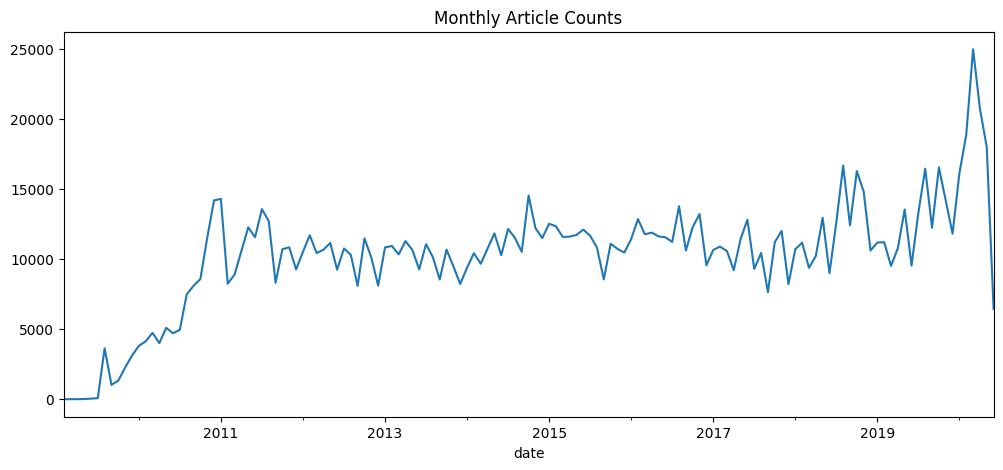

In [24]:
# Convert date → index
eda.process_dates()

# Time series
eda.plot_article_frequency()

# Step 5: Text Analysis - Most Frequent Words

[('vs', 162099), ('stocks', 161776), ('est', 140604), ('eps', 128897), ('market', 120558), ('shares', 114313), ('reports', 108710), ('update', 91723), ('earnings', 87399), ('sales', 79645), ('top', 79632), ('benzinga', 74516), ('pt', 73068), ('week', 69572), ('announces', 66591), ('price', 64407), ('buy', 64371), ('mid', 62263), ('downgrades', 61959), ('trading', 61182)]


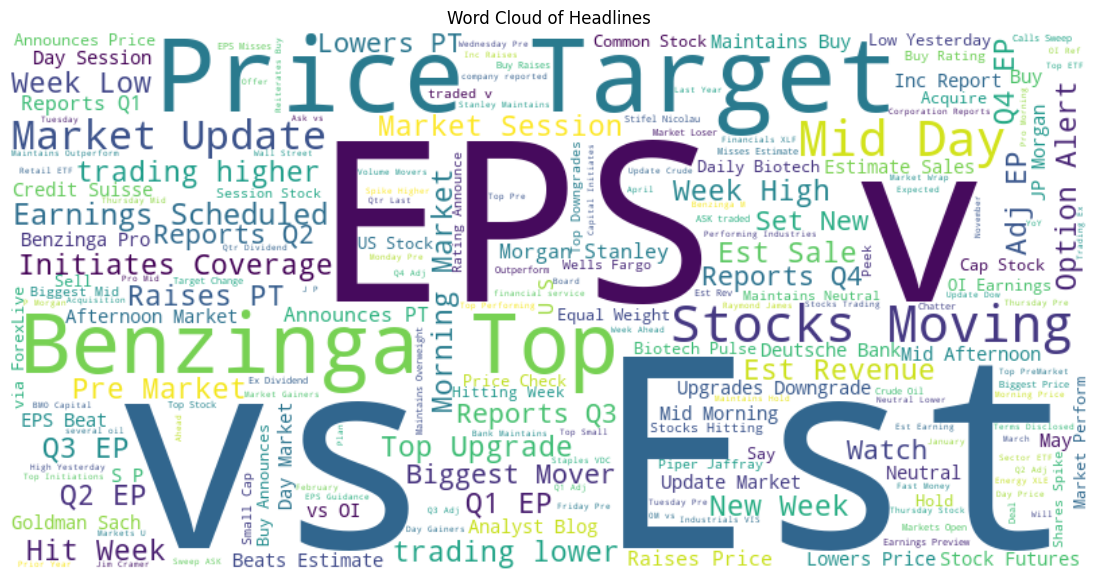

In [25]:
# Word frequency + cloud
print(eda.top_words())
eda.plot_wordcloud()

# Step 6: Time Analysis - Hour of Day


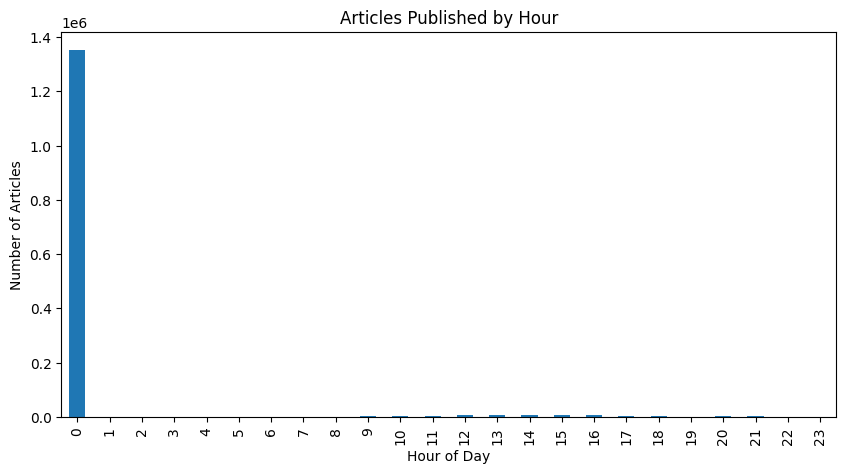

In [26]:
# Hourly distribution
eda.plot_hourly_distribution()


# Extract Domains from Publisher Emails (if any)


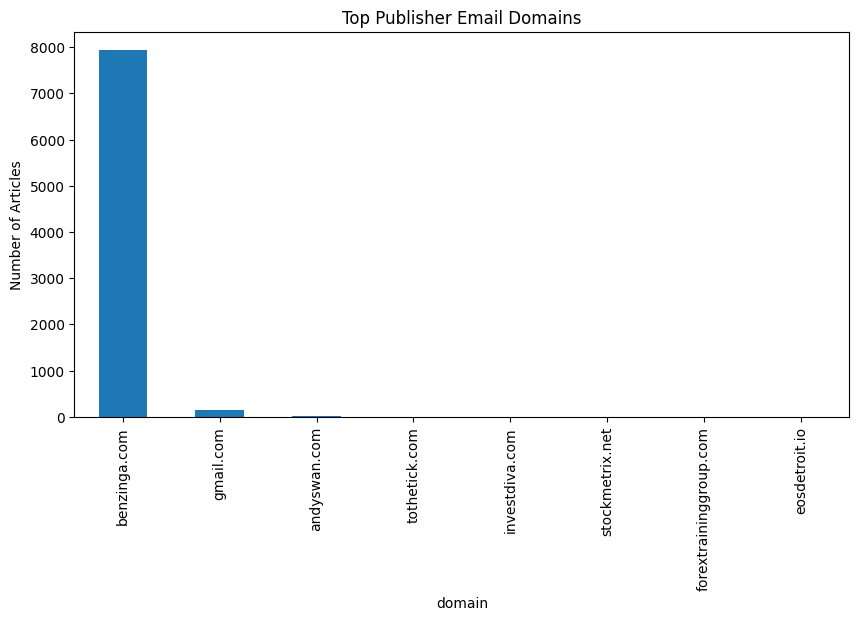

In [27]:
# Domain extraction
eda.plot_domains()